In [1]:
import numpy as np
import torch 
import torchvision
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

In [3]:
train_set = datasets.MNIST('MNIST_data/trainset', download=True, train=True, transform=transform)
val_set = datasets.MNIST('MNIST_data/testset', download=True, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=True)


In [4]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


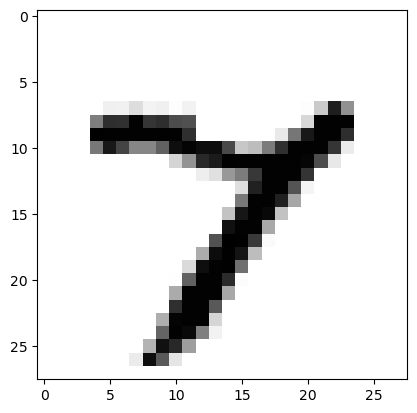

In [5]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [6]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), nn.ReLU(), 
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]), nn.ReLU(), 
                      nn.Linear(hidden_sizes[1], output_size), nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [8]:
#training loop 
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 50
train_losses, test_losses = [], []


for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in val_loader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        model.train()
        
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(val_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(val_loader)))

Epoch: 1/50..  Training Loss: 0.049..  Test Loss: 0.099..  Test Accuracy: 0.969
Epoch: 2/50..  Training Loss: 0.045..  Test Loss: 0.076..  Test Accuracy: 0.975
Epoch: 3/50..  Training Loss: 0.042..  Test Loss: 0.074..  Test Accuracy: 0.977
Epoch: 4/50..  Training Loss: 0.039..  Test Loss: 0.076..  Test Accuracy: 0.976
Epoch: 5/50..  Training Loss: 0.035..  Test Loss: 0.080..  Test Accuracy: 0.974
Epoch: 6/50..  Training Loss: 0.034..  Test Loss: 0.078..  Test Accuracy: 0.977
Epoch: 7/50..  Training Loss: 0.031..  Test Loss: 0.079..  Test Accuracy: 0.976
Epoch: 8/50..  Training Loss: 0.028..  Test Loss: 0.073..  Test Accuracy: 0.978
Epoch: 9/50..  Training Loss: 0.027..  Test Loss: 0.073..  Test Accuracy: 0.978
Epoch: 10/50..  Training Loss: 0.026..  Test Loss: 0.074..  Test Accuracy: 0.976
Epoch: 11/50..  Training Loss: 0.023..  Test Loss: 0.083..  Test Accuracy: 0.977
Epoch: 12/50..  Training Loss: 0.021..  Test Loss: 0.078..  Test Accuracy: 0.978
Epoch: 13/50..  Training Loss: 0.020.